# Flight ticket Price prediction

In [1]:
# Importing all the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Reading and displaying the head of the DF for clarifications
df_train = pd.read_excel('Data_Train.xlsx')
df_test = pd.read_excel('Test_set.xlsx')
df_train.head()
df_train.shape
df_test.head()
df_test.shape

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


(10683, 11)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


(2671, 10)

In [5]:
#Adding both Train and Test data sets together to clean.
df = df_train.append(df_test)
df = df.reset_index(drop=True)
df.Price[np.isnan(df['Price'])] = 0
df.head()
df.tail()
df.shape

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop


,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
13349,No info,Air India,20:25 07 Jun,6/06/2019,20:30,Banglore,23h 55m,0.0,CCU → DEL → BLR,Kolkata,1 stop
13350,No info,IndiGo,16:55,27/03/2019,14:20,Banglore,2h 35m,0.0,CCU → BLR,Kolkata,non-stop
13351,No info,Jet Airways,04:25 07 Mar,6/03/2019,21:50,Cochin,6h 35m,0.0,DEL → BOM → COK,Delhi,1 stop
13352,No info,Air India,19:15,6/03/2019,04:00,Cochin,15h 15m,0.0,DEL → BOM → COK,Delhi,1 stop
13353,No info,Multiple carriers,19:15,15/06/2019,04:55,Cochin,14h 20m,0.0,DEL → BOM → COK,Delhi,1 stop


(13354, 11)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

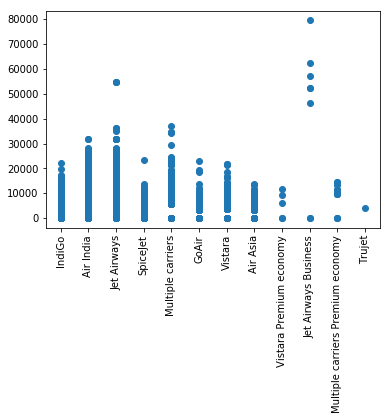

In [5]:
#Checking if airline or Source from flight is leaving or Destination is coreleated to the price
img = plt.scatter(df['Airline'], df['Price'])
plt.xticks(rotation='vertical')
img

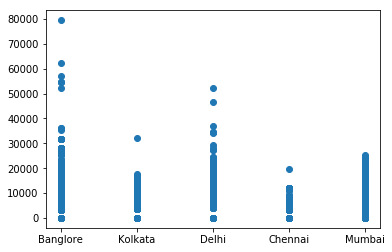

In [6]:
img1 = plt.scatter(df['Source'], df['Price'])
#plt.xticks(rotation='vertical')
display(img1)

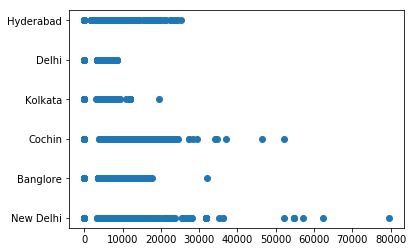

In [7]:
img2 = plt.scatter(df['Price'], df['Destination'])
#plt.xticks(rotation='vertical')
display(img2)

0    6
1    5
2    4
3    3
4    3
Name: Day_of_week, dtype: int64

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Day_of_week,Day_of_Month,Month_of_year
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,6,24,3
1,No info,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,5,5,1
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,4,6,9
3,No info,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,3,5,12
4,No info,IndiGo,21:35,2019-01-03,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,3,3,1


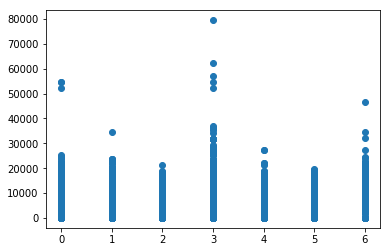

In [6]:
# Converting the Date column to Date time format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
#Converting the dates into Day of week to check if any particular day of the week would have an impact on the price.
df['Day_of_week'] = df['Date_of_Journey'].dt.dayofweek  #Monday =0 and Sunday = 6
df['Day_of_Month'] = df['Date_of_Journey'].dt.day
df['Month_of_year'] = df['Date_of_Journey'].dt.month
df['Day_of_week'].head()
df.head()
#plt.scatter(df['Day_of_Month'],df['Price'])
plt.scatter(df['Day_of_week'],df['Price'])
plt.show()

In [7]:
#Checking for any NAN values
dt = df[df.isnull().any(axis=1)]
dt

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Day_of_week,Day_of_Month,Month_of_year
9039,No info,Air India,09:25 07 May,2019-06-05,09:45,Cochin,23h 40m,7480.0,NaN,Delhi,NaN,2,5,6


In [8]:
# Deleting the NAN values from the Training set as the route and total stope has nan values.
df.drop(9039, inplace=True)
df.iloc[9039,:]
df.shape

Additional_Info                  No info
Airline                        Air India
Arrival_Time                19:15 22 Mar
Date_of_Journey      2019-03-21 00:00:00
Dep_Time                           12:20
Destination                       Cochin
Duration                         30h 55m
Price                              10703
Route              DEL → LKO → BOM → COK
Source                             Delhi
Total_Stops                      2 stops
Day_of_week                            3
Day_of_Month                          21
Month_of_year                          3
Name: 9040, dtype: object

(13353, 14)

In [9]:
# Conveting the catogirical variables to numbers by firs splitting it and then converting to Numeric values.
df['Total_Stops'] = df['Total_Stops'].replace('non-stop', '0 Stop')
df['No_of_stops'] = df['Total_Stops'].str.split(' ').str[0]
#Converting No of stops to Integer
df['No_of_stops'] = df['No_of_stops'].apply(int)
display(df.head())
display(df.dtypes)

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Day_of_week,Day_of_Month,Month_of_year,No_of_stops
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,0 Stop,6,24,3,0
1,No info,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,5,5,1,2
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,4,6,9,2
3,No info,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,3,5,12,1
4,No info,IndiGo,21:35,2019-01-03,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,3,3,1,1


Additional_Info            object
Airline                    object
Arrival_Time               object
Date_of_Journey    datetime64[ns]
Dep_Time                   object
Destination                object
Duration                   object
Price                     float64
Route                      object
Source                     object
Total_Stops                object
Day_of_week                 int64
Day_of_Month                int64
Month_of_year               int64
No_of_stops                 int64
dtype: object

In [10]:
# Converting the Duration from hours and minutes to minutes.
df['Duration_hours'] = df['Duration'].str.split(' ').str[0]
df['Duration_minutes'] = df['Duration'].str.split(' ').str[1]
df['Duration_hours'] = df['Duration_hours'].str.split('h').str[0]
df['Duration_minutes'] = df['Duration_minutes'].str.split('m').str[0]
df['Duration_minutes'] = df['Duration_minutes'].fillna(0)
df['Duration_hours'] = df['Duration_hours'].fillna(0)
df.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Day_of_week,Day_of_Month,Month_of_year,No_of_stops,Duration_hours,Duration_minutes
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,0 Stop,6,24,3,0,2,50
1,No info,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,5,5,1,2,7,25
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,4,6,9,2,19,0
3,No info,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,3,5,12,1,5,25
4,No info,IndiGo,21:35,2019-01-03,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,3,3,1,1,4,45


## WHen I tried to convert the Duration_hours column to INT it threw an error showing that some row has a value '5m' which was a string and after getting the index of that row it made sense to drop it as it had incorrect value as flight was only 5 minutes, however looking at the test set it has row with the same row values which would not predict correct during testing hence including that row

In [11]:
a = df[df['Duration_hours'] == '5m'].index
df.loc[a]

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Day_of_week,Day_of_Month,Month_of_year,No_of_stops,Duration_hours,Duration_minutes
6474,No info,Air India,16:55,2019-06-03,16:50,Hyderabad,5m,17327.0,BOM → GOI → PNQ → HYD,Mumbai,2 stops,0,3,6,2,5m,0
13343,No info,Air India,16:55,2019-12-03,16:50,Hyderabad,5m,0.0,BOM → GOI → PNQ → HYD,Mumbai,2 stops,1,3,12,2,5m,0


In [12]:
#Looking at the data deleting this row makes sense because no flight can travel in 5min to destination after 4 stops. 
# However if we see even the TEST set has the row with same value excuding that would change the prediction a bit.
df.loc[[6474,13343],'Duration_minutes'] = 5
df.loc[[6474,13343],'Duration_hours'] = 0
df.loc[[6474,13343]]

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Day_of_week,Day_of_Month,Month_of_year,No_of_stops,Duration_hours,Duration_minutes
6474,No info,Air India,16:55,2019-06-03,16:50,Hyderabad,5m,17327.0,BOM → GOI → PNQ → HYD,Mumbai,2 stops,0,3,6,2,0,5
13343,No info,Air India,16:55,2019-12-03,16:50,Hyderabad,5m,0.0,BOM → GOI → PNQ → HYD,Mumbai,2 stops,1,3,12,2,0,5


In [13]:
#Now converting the Hours and minutes into one column that is total number of minutes taken for the Journey
df['Duration_minutes'] = df['Duration_minutes'].astype(int)
df['Duration_hours'] = df['Duration_hours'].astype(int)
df['Total_Duration'] = (df['Duration_hours'] * 60)+ df['Duration_minutes'] #IN MINutes
df.head()
df.dtypes


,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Day_of_week,Day_of_Month,Month_of_year,No_of_stops,Duration_hours,Duration_minutes,Total_Duration
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,0 Stop,6,24,3,0,2,50,170
1,No info,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,5,5,1,2,7,25,445
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,4,6,9,2,19,0,1140
3,No info,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,3,5,12,1,5,25,325
4,No info,IndiGo,21:35,2019-01-03,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,3,3,1,1,4,45,285


Additional_Info             object
Airline                     object
Arrival_Time                object
Date_of_Journey     datetime64[ns]
Dep_Time                    object
Destination                 object
Duration                    object
Price                      float64
Route                       object
Source                      object
Total_Stops                 object
Day_of_week                  int64
Day_of_Month                 int64
Month_of_year                int64
No_of_stops                  int64
Duration_hours               int32
Duration_minutes             int32
Total_Duration               int32
dtype: object

In [14]:
df.columns

Index(['Additional_Info', 'Airline', 'Arrival_Time', 'Date_of_Journey',
       'Dep_Time', 'Destination', 'Duration', 'Price', 'Route', 'Source',
       'Total_Stops', 'Day_of_week', 'Day_of_Month', 'Month_of_year',
       'No_of_stops', 'Duration_hours', 'Duration_minutes', 'Total_Duration'],
      dtype='object')

In [16]:
#Creating a copy
df1 = df[['Additional_Info', 'Airline', 'Arrival_Time', 'Date_of_Journey',
       'Dep_Time', 'Destination', 'Duration', 'Price', 'Route', 'Source',
       'Total_Stops', 'Day_of_week', 'Day_of_Month', 'Month_of_year',
       'No_of_stops', 'Duration_hours', 'Duration_minutes', 'Total_Duration']]
df1.head()
df1.dtypes

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Day_of_week,Day_of_Month,Month_of_year,No_of_stops,Duration_hours,Duration_minutes,Total_Duration
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,0 Stop,6,24,3,0,2,50,170
1,No info,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,5,5,1,2,7,25,445
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,4,6,9,2,19,0,1140
3,No info,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,3,5,12,1,5,25,325
4,No info,IndiGo,21:35,2019-01-03,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,3,3,1,1,4,45,285


Additional_Info             object
Airline                     object
Arrival_Time                object
Date_of_Journey     datetime64[ns]
Dep_Time                    object
Destination                 object
Duration                    object
Price                      float64
Route                       object
Source                      object
Total_Stops                 object
Day_of_week                  int64
Day_of_Month                 int64
Month_of_year                int64
No_of_stops                  int64
Duration_hours               int32
Duration_minutes             int32
Total_Duration               int32
dtype: object

In [25]:
#Converting the Dep and Arrival to Numeric
df1['Arrival_time_HR'] = df1['Arrival_Time'].str.split(':').str[0]
df1['Arrival_time_HR'] = df1['Arrival_time_HR'].apply(int)

df1['Arrival_time_min'] = df1['Arrival_Time'].str.split(' ').str[0]
df1['Arrival_time_min'] = df1['Arrival_time_min'].str.split(':').str[1]
df1['Arrival_time_min'] = df1['Arrival_time_min'].apply(int)

df1['Dep_time_HR'] = df1['Dep_Time'].str.split(':').str[0]
df1['Dep_time_HR'] = df1['Dep_time_HR'].apply(int)

df1['Dep_time_min'] = df1['Dep_Time'].str.split(' ').str[0]
df1['Dep_time_min'] = df1['Dep_time_min'].str.split(':').str[1]
df1['Dep_time_min'] = df1['Dep_time_min'].apply(int)

df1.head()
df1.Arrival_time_min.unique()
df1.Dep_time_min.unique()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,...,Day_of_Month,Month_of_year,No_of_stops,Duration_hours,Duration_minutes,Total_Duration,Arrival_time_HR,Dep_time_HR,Arrival_time_min,Dep_time_min
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,...,24,3,0,2,50,170,1,22,10,20
1,No info,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,...,5,1,2,7,25,445,13,5,15,50
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,...,6,9,2,19,0,1140,4,9,25,25
3,No info,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,...,5,12,1,5,25,325,23,18,30,5
4,No info,IndiGo,21:35,2019-01-03,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,...,3,1,1,4,45,285,21,16,35,50


array([10, 15, 25, 30, 35,  5,  0, 55, 20, 50, 45, 40], dtype=int64)

array([20, 50, 25,  5,  0, 55, 45, 40, 10, 15, 35, 30], dtype=int64)

In [26]:
df1.dtypes

Additional_Info             object
Airline                     object
Arrival_Time                object
Date_of_Journey     datetime64[ns]
Dep_Time                    object
Destination                 object
Duration                    object
Price                      float64
Route                       object
Source                      object
Total_Stops                 object
Day_of_week                  int64
Day_of_Month                 int64
Month_of_year                int64
No_of_stops                  int64
Duration_hours               int32
Duration_minutes             int32
Total_Duration               int32
Arrival_time_HR              int64
Dep_time_HR                  int64
Arrival_time_min             int64
Dep_time_min                 int64
dtype: object

In [36]:

df1.columns

Index(['Additional_Info', 'Airline', 'Arrival_Time', 'Date_of_Journey',
       'Dep_Time', 'Destination', 'Duration', 'Price', 'Route', 'Source',
       'Total_Stops', 'Day_of_week', 'Day_of_Month', 'Month_of_year',
       'No_of_stops', 'Duration_hours', 'Duration_minutes', 'Total_Duration',
       'Arrival_time_HR', 'Dep_time_HR', 'Arrival_time_min', 'Dep_time_min',
       'Source_num', 'Destination_num', 'Airline_num', 'Additional_Info_num',
       'Route1', 'Route1_num', 'Route2', 'Route2_num', 'Route3', 'Route3_num',
       'Route4', 'Route4_num'],
      dtype='object')

In [28]:
#Converting the Source and destination to numbers using Label encoding technique
df1['Source'] = df1['Source'].astype('category')
df1['Source_num'] = df1['Source'].cat.codes
df1['Source_num'] = df1['Source_num'].apply(int)
df1['Destination'] = df1['Destination'].astype('category')
df1['Destination_num'] = df1['Destination'].cat.codes
df1['Destination_num'] = df1['Destination_num'].apply(int)
df1['Airline'] = df1['Airline'].astype('category')
df1['Airline_num'] = df1['Airline'].cat.codes
df1['Airline_num'] = df1['Airline_num'].apply(int)
df1.dtypes

Additional_Info             object
Airline                   category
Arrival_Time                object
Date_of_Journey     datetime64[ns]
Dep_Time                    object
Destination               category
Duration                    object
Price                      float64
Route                       object
Source                    category
Total_Stops                 object
Day_of_week                  int64
Day_of_Month                 int64
Month_of_year                int64
No_of_stops                  int64
Duration_hours               int32
Duration_minutes             int32
Total_Duration               int32
Arrival_time_HR              int64
Dep_time_HR                  int64
Arrival_time_min             int64
Dep_time_min                 int64
Source_num                   int64
Destination_num              int64
Airline_num                  int64
dtype: object

In [29]:
display(df1.Source_num.unique())
display(df1.Destination_num.unique())
display(df1.Airline_num.unique())

array([0, 3, 2, 1, 4], dtype=int64)

array([5, 0, 1, 4, 2, 3], dtype=int64)

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9], dtype=int64)

In [31]:
df1['Additional_Info'] = df1['Additional_Info'].astype('category')
df1['Additional_Info_num'] = df1['Additional_Info'].cat.codes
df1['Additional_Info_num'] = df1['Additional_Info_num'].apply(int)
df1.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,...,Duration_minutes,Total_Duration,Arrival_time_HR,Dep_time_HR,Arrival_time_min,Dep_time_min,Source_num,Destination_num,Airline_num,Additional_Info_num
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,...,50,170,1,22,10,20,0,5,3,8
1,No info,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,...,25,445,13,5,15,50,3,0,1,8
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,...,0,1140,4,9,25,25,2,1,4,8
3,No info,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,...,25,325,23,18,30,5,3,0,3,8
4,No info,IndiGo,21:35,2019-01-03,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,...,45,285,21,16,35,50,0,5,3,8


In [33]:
#Converting Route to Numeric
df1['Route1'] = df1['Route'].str.split('→').str[0]
df1['Route1'] = df1['Route1'].fillna('none')
df1['Route1'] = df1['Route1'].astype('category')
df1['Route1_num'] = df1['Route1'].cat.codes
df1['Route1_num'] = df1['Route1_num'].apply(int)

df1['Route2'] = df1['Route'].str.split('→').str[1]
df1['Route2'] = df1['Route2'].fillna('none')
df1['Route2'] = df1['Route2'].astype('category')
df1['Route2_num'] = df1['Route2'].cat.codes
df1['Route2_num'] = df1['Route2_num'].apply(int)

df1['Route3'] = df1['Route'].str.split('→').str[2]
df1['Route3'] = df1['Route3'].fillna('none')
df1['Route3'] = df1['Route3'].astype('category')
df1['Route3_num'] = df1['Route3'].cat.codes
df1['Route3_num'] = df1['Route3_num'].apply(int)

df1['Route4'] = df1['Route'].str.split('→').str[3]
df1['Route4'] = df1['Route4'].fillna('none')
df1['Route4'] = df1['Route4'].astype('category')
df1['Route4_num'] = df1['Route4'].cat.codes
df1['Route4_num'] = df1['Route4_num'].apply(int)
df1.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,...,Airline_num,Additional_Info_num,Route1,Route1_num,Route2,Route2_num,Route3,Route3_num,Route4,Route4_num
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,...,3,8,BLR,0,DEL,13,none,30,none,13
1,No info,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,...,1,8,CCU,2,IXR,25,BBI,1,BLR,3
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,...,4,8,DEL,3,LKO,32,BOM,4,COK,5
3,No info,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,...,3,8,CCU,2,NAG,34,BLR,3,none,13
4,No info,IndiGo,21:35,2019-01-03,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,...,3,8,BLR,0,NAG,34,DEL,8,none,13


In [37]:
df.columns
df1.columns

Index(['Additional_Info', 'Airline', 'Arrival_Time', 'Date_of_Journey',
       'Dep_Time', 'Destination', 'Duration', 'Price', 'Route', 'Source',
       'Total_Stops', 'Day_of_week', 'Day_of_Month', 'Month_of_year',
       'No_of_stops', 'Duration_hours', 'Duration_minutes', 'Total_Duration'],
      dtype='object')

Index(['Additional_Info', 'Airline', 'Arrival_Time', 'Date_of_Journey',
       'Dep_Time', 'Destination', 'Duration', 'Price', 'Route', 'Source',
       'Total_Stops', 'Day_of_week', 'Day_of_Month', 'Month_of_year',
       'No_of_stops', 'Duration_hours', 'Duration_minutes', 'Total_Duration',
       'Arrival_time_HR', 'Dep_time_HR', 'Arrival_time_min', 'Dep_time_min',
       'Source_num', 'Destination_num', 'Airline_num', 'Additional_Info_num',
       'Route1', 'Route1_num', 'Route2', 'Route2_num', 'Route3', 'Route3_num',
       'Route4', 'Route4_num'],
      dtype='object')

In [51]:
df2 = df1[['Airline_num', 'Day_of_Month','Month_of_year','Source_num', 'Destination_num','Duration_hours', 
           'Duration_minutes','Dep_time_HR','Dep_time_min', 'Arrival_time_HR','Arrival_time_min', 'No_of_stops',
           'Additional_Info_num', 'Route1_num', 'Route2_num', 'Route3_num','Route4_num','Day_of_week' ,
           'Date_of_Journey' ,'Total_Duration','Price']]
df2.head()
df2.dtypes

,Airline_num,Day_of_Month,Month_of_year,Source_num,Destination_num,Duration_hours,Duration_minutes,Dep_time_HR,Dep_time_min,Arrival_time_HR,...,No_of_stops,Additional_Info_num,Route1_num,Route2_num,Route3_num,Route4_num,Day_of_week,Date_of_Journey,Total_Duration,Price
0,3,24,3,0,5,2,50,22,20,1,...,0,8,0,13,30,13,6,2019-03-24,170,3897.0
1,1,5,1,3,0,7,25,5,50,13,...,2,8,2,25,1,3,5,2019-01-05,445,7662.0
2,4,6,9,2,1,19,0,9,25,4,...,2,8,3,32,4,5,4,2019-09-06,1140,13882.0
3,3,5,12,3,0,5,25,18,5,23,...,1,8,2,34,3,13,3,2019-12-05,325,6218.0
4,3,3,1,0,5,4,45,16,50,21,...,1,8,0,34,8,13,3,2019-01-03,285,13302.0


Airline_num                     int64
Day_of_Month                    int64
Month_of_year                   int64
Source_num                      int64
Destination_num                 int64
Duration_hours                  int32
Duration_minutes                int32
Dep_time_HR                     int64
Dep_time_min                    int64
Arrival_time_HR                 int64
Arrival_time_min                int64
No_of_stops                     int64
Additional_Info_num             int64
Route1_num                      int64
Route2_num                      int64
Route3_num                      int64
Route4_num                      int64
Day_of_week                     int64
Date_of_Journey        datetime64[ns]
Total_Duration                  int32
Price                         float64
dtype: object

In [52]:
df2 = df2.reset_index(drop=True)
df2.shape


(13353, 21)

# Spliting the date into train and test split according to the first append.

In [92]:
#Training Data
Train_df = df2[0:10682]
Train_df.shape
#TEST DATA
Test_df = df2[10682:]
Test_df = Test_df.reset_index(drop=True)
Test_df.drop('Price', inplace=True, axis=1)
Test_df.head()
Test_df.shape
Train_df.columns

(10682, 21)

,Airline_num,Day_of_Month,Month_of_year,Source_num,Destination_num,Duration_hours,Duration_minutes,Dep_time_HR,Dep_time_min,Arrival_time_HR,Arrival_time_min,No_of_stops,Additional_Info_num,Route1_num,Route2_num,Route3_num,Route4_num,Day_of_week,Date_of_Journey,Total_Duration
0,4,6,6,2,1,10,55,17,30,4,25,1,8,3,7,6,13,3,2019-06-06,655
1,3,5,12,3,0,4,0,6,20,10,20,1,8,2,33,3,13,3,2019-12-05,240
2,4,21,5,2,1,23,45,19,15,19,0,1,5,3,7,6,13,1,2019-05-21,1425
3,6,21,5,2,1,13,0,8,0,21,0,1,8,3,7,6,13,1,2019-05-21,780
4,0,24,6,0,2,2,50,23,55,2,45,0,8,0,13,30,13,0,2019-06-24,170


(2671, 20)

Index(['Airline_num', 'Day_of_Month', 'Month_of_year', 'Source_num',
       'Destination_num', 'Duration_hours', 'Duration_minutes', 'Dep_time_HR',
       'Dep_time_min', 'Arrival_time_HR', 'Arrival_time_min', 'No_of_stops',
       'Additional_Info_num', 'Route1_num', 'Route2_num', 'Route3_num',
       'Route4_num', 'Day_of_week', 'Date_of_Journey', 'Total_Duration',
       'Price'],
      dtype='object')

In [93]:
#Creating a copy Excluding 'Day_of_week', 'Date_of_Journey', 'Total_Duration',
Train_df = Train_df[['Airline_num', 'Day_of_Month', 'Month_of_year', 'Source_num',
       'Destination_num', 'Duration_hours', 'Duration_minutes', 'Dep_time_HR',
       'Dep_time_min', 'Arrival_time_HR', 'Arrival_time_min', 'No_of_stops',
       'Additional_Info_num', 'Route1_num', 'Route2_num', 'Route3_num',
       'Route4_num','Total_Duration',
       'Price']]
Test_df = Test_df[['Airline_num', 'Day_of_Month', 'Month_of_year', 'Source_num',
       'Destination_num', 'Duration_hours', 'Duration_minutes', 'Dep_time_HR',
       'Dep_time_min', 'Arrival_time_HR', 'Arrival_time_min', 'No_of_stops',
       'Additional_Info_num', 'Route1_num', 'Route2_num', 'Route3_num',
       'Route4_num','Total_Duration']]
Train_df.head()
Train_df.dtypes
Train_df.columns

,Airline_num,Day_of_Month,Month_of_year,Source_num,Destination_num,Duration_hours,Duration_minutes,Dep_time_HR,Dep_time_min,Arrival_time_HR,Arrival_time_min,No_of_stops,Additional_Info_num,Route1_num,Route2_num,Route3_num,Route4_num,Total_Duration,Price
0,3,24,3,0,5,2,50,22,20,1,10,0,8,0,13,30,13,170,3897.0
1,1,5,1,3,0,7,25,5,50,13,15,2,8,2,25,1,3,445,7662.0
2,4,6,9,2,1,19,0,9,25,4,25,2,8,3,32,4,5,1140,13882.0
3,3,5,12,3,0,5,25,18,5,23,30,1,8,2,34,3,13,325,6218.0
4,3,3,1,0,5,4,45,16,50,21,35,1,8,0,34,8,13,285,13302.0


Airline_num              int64
Day_of_Month             int64
Month_of_year            int64
Source_num               int64
Destination_num          int64
Duration_hours           int32
Duration_minutes         int32
Dep_time_HR              int64
Dep_time_min             int64
Arrival_time_HR          int64
Arrival_time_min         int64
No_of_stops              int64
Additional_Info_num      int64
Route1_num               int64
Route2_num               int64
Route3_num               int64
Route4_num               int64
Total_Duration           int32
Price                  float64
dtype: object

Index(['Airline_num', 'Day_of_Month', 'Month_of_year', 'Source_num',
       'Destination_num', 'Duration_hours', 'Duration_minutes', 'Dep_time_HR',
       'Dep_time_min', 'Arrival_time_HR', 'Arrival_time_min', 'No_of_stops',
       'Additional_Info_num', 'Route1_num', 'Route2_num', 'Route3_num',
       'Route4_num', 'Total_Duration', 'Price'],
      dtype='object')

In [97]:
from sklearn.model_selection import train_test_split
X = Train_df[['Airline_num', 'Day_of_Month', 'Month_of_year', 'Source_num',
       'Destination_num', 'Duration_hours', 'Duration_minutes', 'Dep_time_HR',
       'Dep_time_min', 'Arrival_time_HR', 'Arrival_time_min', 'No_of_stops',
       'Additional_Info_num', 'Route1_num', 'Route2_num', 'Route3_num',
       'Route4_num','Total_Duration']]
y = Train_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8545, 18) (8545,)
Test set: (2137, 18) (2137,)


# 1. Multiple Linear Regression

### Training the model

In [95]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(X_train)
y = np.asanyarray(y_train)
regr.fit(x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Coefficients:  [ 1.46395399e+02 -7.31786073e+01 -8.88830597e+01 -1.30839309e+02
  4.30927705e+02  2.13836695e-01 -1.22226611e+01  2.37855575e+01
 -1.82414793e+00 -1.44078078e+01 -2.34319859e-01  2.65434276e+03
  2.02623114e+02 -4.10854855e+02 -1.02483855e+02 -1.39030152e+02
 -2.92618247e+01  6.07540672e-01]


### Testing the model

In [96]:
y_hat= regr.predict(X_test)
y_hat
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

rms = sqrt(mean_squared_error(y_test, y_hat))
rms
print("R2-score: %.2f" % r2_score(y_test , y_hat))
df = pd.DataFrame({"a": [a]})

array([ 9740.02849682, 11384.09019803,  9352.62930529, ...,
       11105.63353118, 14522.54439932, 11900.61698133])

3403.246410572868

R2-score: 0.48


In [74]:
X.columns
Train_df.columns
Test_df.columns

Index(['Airline_num', 'Day_of_Month', 'Month_of_year', 'Source_num',
       'Destination_num', 'Duration_hours', 'Duration_minutes', 'Dep_time_HR',
       'Dep_time_min', 'Arrival_time_HR', 'Arrival_time_min', 'No_of_stops',
       'Additional_Info_num', 'Route1_num', 'Route2_num', 'Route3_num',
       'Route4_num'],
      dtype='object')

Index(['Airline_num', 'Day_of_Month', 'Month_of_year', 'Source_num',
       'Destination_num', 'Duration_hours', 'Duration_minutes', 'Dep_time_HR',
       'Dep_time_min', 'Arrival_time_HR', 'Arrival_time_min', 'No_of_stops',
       'Additional_Info_num', 'Route1_num', 'Route2_num', 'Route3_num',
       'Route4_num', 'Price'],
      dtype='object')

Index(['Airline_num', 'Day_of_Month', 'Month_of_year', 'Source_num',
       'Destination_num', 'Duration_hours', 'Duration_minutes', 'Dep_time_HR',
       'Dep_time_min', 'Arrival_time_HR', 'Arrival_time_min', 'No_of_stops',
       'Additional_Info_num', 'Route1_num', 'Route2_num', 'Route3_num',
       'Route4_num'],
      dtype='object')

### Predicting on Submission Test set

# 2. Extreme Gradient boosting

In [27]:
!pip install xgboost

In [64]:
from sklearn.model_selection import GridSearchCV
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4
import xgboost as xgb
from xgboost import XGBRegressor

In [98]:
xgb3 = xgb.XGBRegressor(learinig_rate=0.1, n_estimator =200, max_depth=10, 
                            min_child_weight= 6, gamma=0, subsample=0.7, 
                            colsample_bytree=0.8, objective='reg:linear',
                            nthread=4, scale_pos_weight=1,seed=27,reg_alpha=0.00006)
xgb_fit= xgb3.fit(X_train, y_train)
    

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [99]:
Y_pred = xgb_fit.predict(X_test)

In [101]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
rms = sqrt(mean_squared_error(y_test, Y_pred))
rms
print("R2-score: %.2f" % r2_score(y_test , Y_pred))

1364.267450661091

R2-score: 0.92


# Training and predicting on  entire train and test dataset

In [102]:
xgb_fit1 = xgb3.fit(X, y)
Y_pred = xgb_fit1.predict(Test_df)
SubmissionXGB = pd.DataFrame({"Price": Y_pred})
SubmissionXGB

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


,Price
0,14456.435547
1,4295.506348
2,12705.393555
3,10382.302734
4,3627.847900
5,10306.360352
6,9323.640625
7,5684.989746
8,4806.440430
9,14737.110352


In [103]:
SubmissionXGB = pd.DataFrame({"Price": Y_pred})
SubmissionXGB
SubmissionXGB.to_excel("SubmissionXGB5.xlsx")

,Price
0,14456.435547
1,4295.506348
2,12705.393555
3,10382.302734
4,3627.847900
5,10306.360352
6,9323.640625
7,5684.989746
8,4806.440430
9,14737.110352
